# ДЗ №2 по курсу "Прикладная теория графов"


# Мендель Александр, 154

### 1. Загрузка данных

In [261]:
import numpy as np
import networkx as nx
import pandas as pd
import random

import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
df = pd.read_csv('globalterrorismdb_0718dist_2.csv', index_col='eventid')
df.head(3)

/home/alexander/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4,6,31,33,61,62,63,70,76,79,90,92,94,96,101,107,112,114,115,117,118,119,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
eventid,,,,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


---

In [262]:
def add_bridges(g, cnt):
    bridges = list((nx.complement(g)).edges)
    random.shuffle(bridges)
    g.add_edges_from(bridges[:cnt])
    
    return g

### 2-3. Создаем графы и удаляем изолированные вершины и мультиребра

In [222]:
def get_topn_components(g, cnt_comp):
    top_comps = sorted(list(nx.connected_components(g)), key=lambda x: len(x), reverse=True)
    top_comps = top_comps[cnt_comp:]
    
    all_comps_vertices = []
    for each_comp in top_comps:
        all_comps_vertices.extend(list(each_comp))
        
    g.remove_nodes_from(all_comps_vertices)
    
    return g

In [248]:
def makeGraph(year, bridge_number=None, cnt_comp=None):

    cond1 = df['iyear'] == year
    cond2 = pd.notna(df['related'])
    year_df = df.loc[ cond1 & cond2 ]
    V = year_df.index
  
    g = nx.Graph()
    g.add_nodes_from(V)

    for v in V:
        for u in year_df.loc[v]['related'].split(','):
            if v != u:
                g.add_edge(v, u)
                
   
    g = get_topn_components(g, cnt_comp)
    g = add_bridges(g, bridge_number)
                
    return g

In [249]:
def plot_graph(g):
    plt.figure(figsize=(20,20))
    nx.draw_networkx(g1, node_size=100)
    plt.show()

Графы 2003 и 2004 годов. Возьмем топ 10 компонент и добавим туда несколько ребер, чтобы граф не распадался

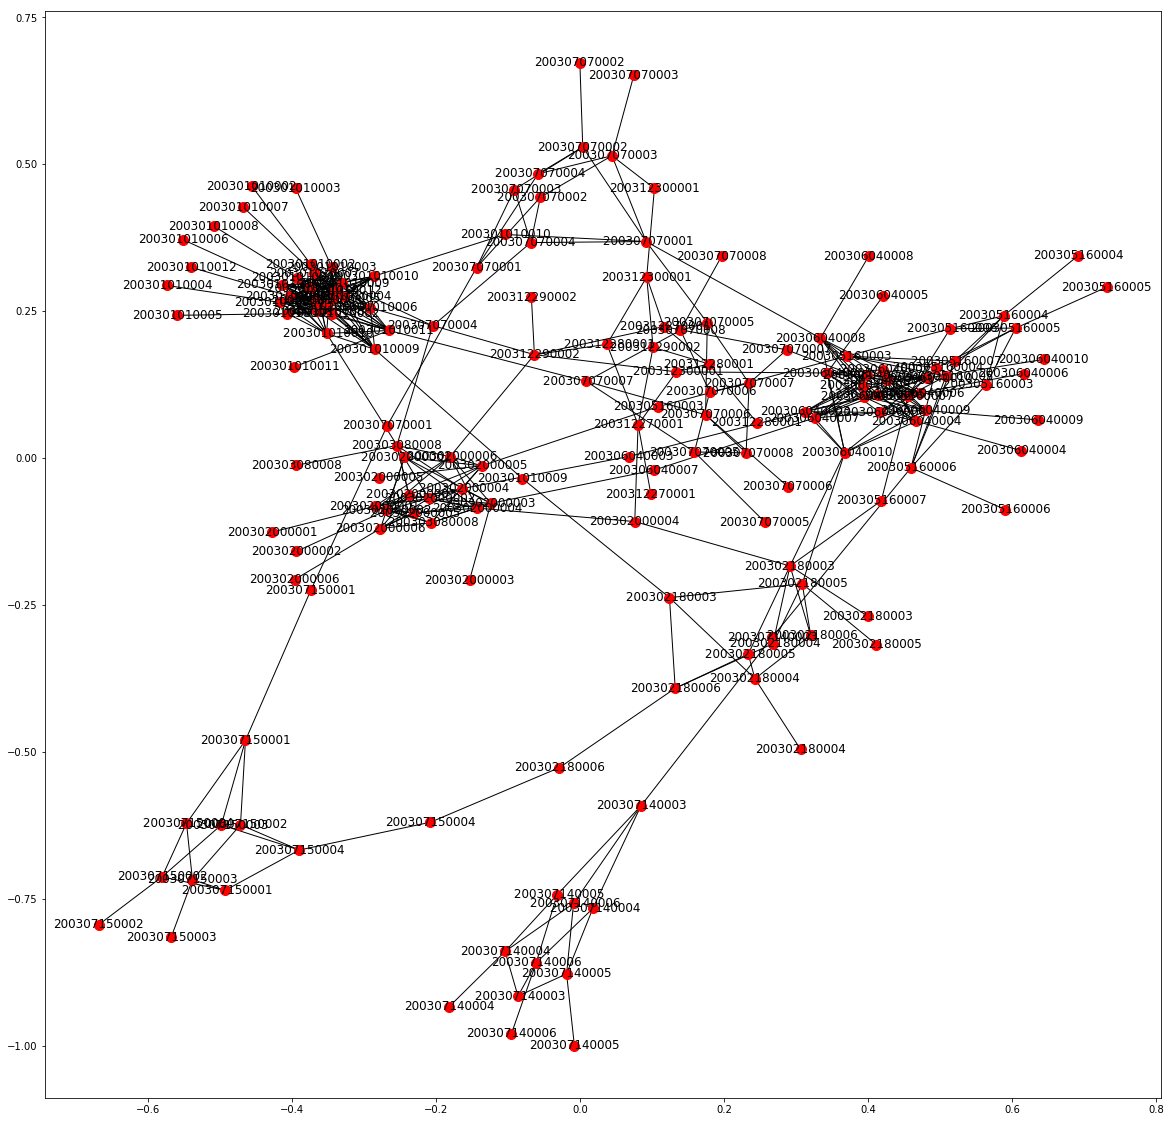

In [250]:
g1 = makeGraph(2003, 25, 10) 
plot_graph(g1)

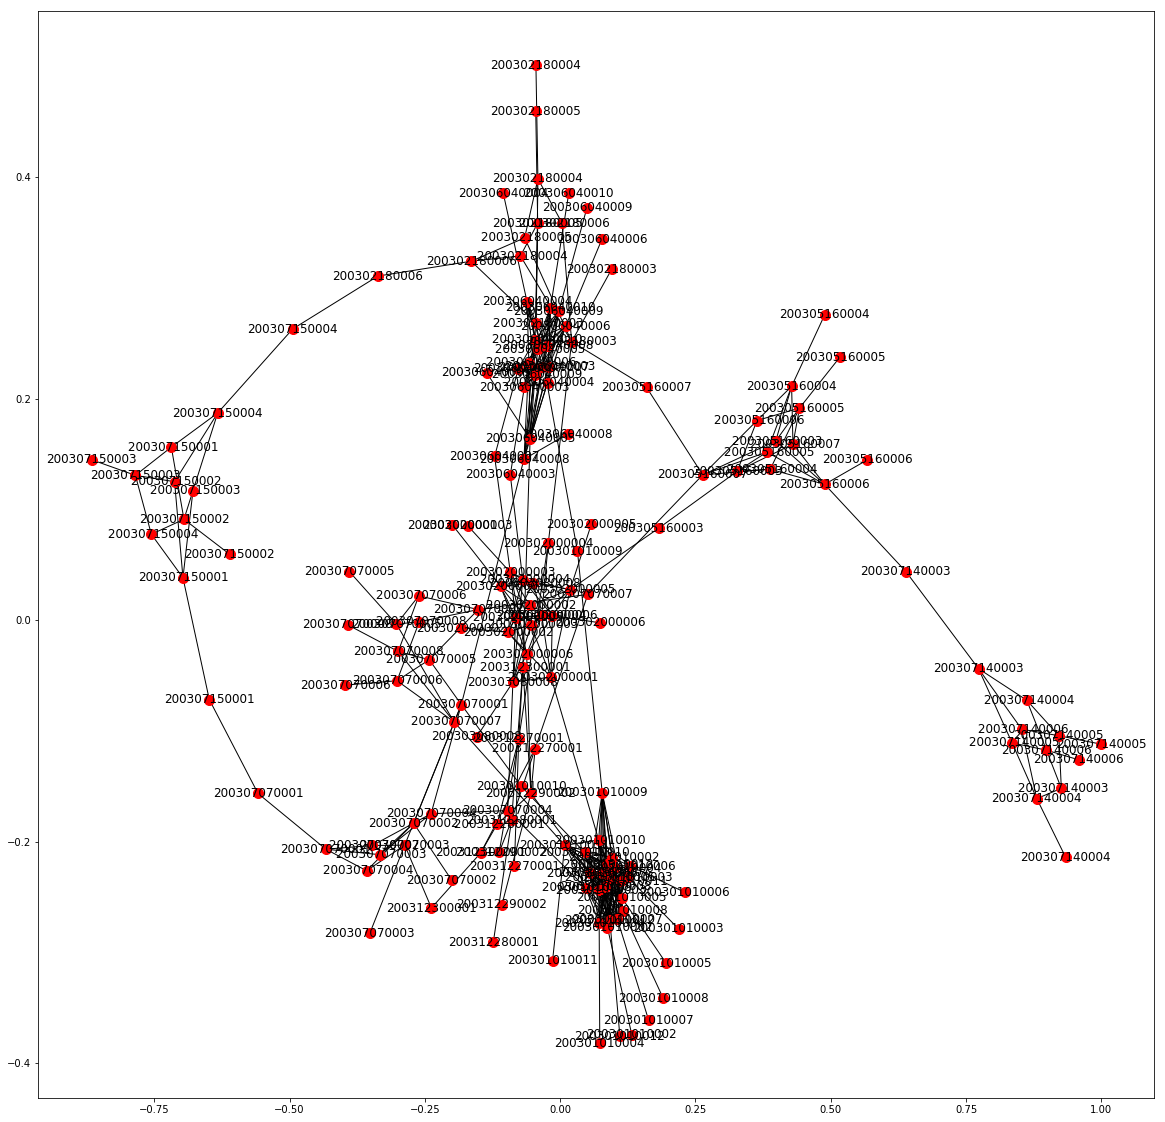

In [251]:
g2 = makeGraph(2004, 25, 10)
plot_graph(g2)

### 5. Ключевые метрики

In [271]:
def get_matrix(g):
    ids = list(g.nodes)
    n = len(ids)
    M = np.zeros((n, n))
    for i, j in g.edges:
        v, u = ids.index(i), ids.index(j)
        print(v, u)
        M[v][u] = 1
        M[u][v] = 1
        
    return M

In [270]:
def floyd(matrix):
    INF = 1e9
    m = np.copy(matrix)
    n = m.shape[0]
    m[m == 0] = INF
    
    for k in range(n):
        for i in range(n):
            for j in range(n):
                m[i][j] = min(m[i][j], m[i][k] + m[k][j])
        
    return m

In [272]:
m1 = get_matrix(g1)
m2 = get_matrix(g2)


0 88
0 140
1 22
1 23
1 24
1 100
1 25
1 26
1 27
1 28
1 29
1 30
2 118
2 119
2 120
3 67
4 138
4 139
4 140
4 141
5 21
5 22
5 23
5 24
5 100
5 25
5 27
5 28
5 29
5 30
6 122
6 65
6 112
6 63
7 88
7 89
7 90
8 156
8 127
8 58
8 97
9 21
9 22
9 23
9 100
9 25
9 26
9 27
9 28
9 29
9 30
10 31
10 142
10 45
10 72
11 71
11 45
11 31
11 164
12 31
12 116
12 142
12 161
12 164
13 142
13 164
13 45
13 101
14 75
14 32
14 98
14 133
15 133
15 99
15 107
15 98
16 32
16 58
16 107
16 98
17 59
17 133
17 32
17 107
18 69
19 76
19 81
19 84
20 76
21 78
21 43
21 125
21 130
21 106
21 103
21 66
21 149
21 77
22 130
22 125
22 43
22 103
22 77
22 66
22 149
22 102
23 130
23 125
23 43
23 78
23 66
23 96
23 149
23 77
24 130
24 43
24 125
24 56
24 78
24 103
24 66
24 149
24 77
25 130
25 43
25 78
25 103
25 162
25 66
25 149
25 77
26 130
26 125
26 43
26 78
26 103
26 77
26 66
26 117
26 149
27 43
27 125
27 103
27 78
27 60
27 66
27 149
27 77
28 130
28 125
28 66
28 78
28 103
28 77
28 145
28 149
29 43
29 125
29 130
29 157
29 66
29 133
29 78
29 10

Диаметр

In [255]:
distance_matrix1 = floyd(m1)
distance_matrix2 = floyd(m2)

In [256]:
d1 = np.max(distance_matrix1)
d2 = np.max(distance_matrix2)
d1, d2

(17.0, 13.0)

---

In [257]:
eccentricity1 = np.max(distance_matrix1, axis=0)
eccentricity2 = np.max(distance_matrix2, axis=0)
eccentricity1, eccentricity2

(array([13., 13., 10., 13., 11., 13., 16., 15., 11., 13., 14., 12., 12.,
        12., 13., 11., 11., 11., 13., 15., 17., 12., 12., 12., 12., 12.,
        12., 12., 12., 12., 12., 13., 12., 12., 11., 11., 10., 11., 17.,
        12., 15., 11., 11., 11., 11., 13., 10., 11., 11., 11., 11., 11.,
        13., 15., 13., 12., 13., 17., 11., 12., 13., 12., 10., 17., 12.,
        16., 13., 12., 12., 12., 12., 13., 15., 12., 12., 14., 16., 13.,
        13., 17., 11., 16., 12., 13., 14., 12., 10., 12., 14., 16., 16.,
        11., 13., 11., 12., 16., 13., 10., 12., 12., 12., 12., 13., 13.,
        13., 10., 13., 10., 11., 12., 12., 13., 15., 11., 11., 13., 13.,
        13.,  9., 11., 11., 12., 15., 13., 14., 13., 12., 11., 12., 12.,
        13., 13., 12., 12., 12., 13., 11., 12., 12., 12., 12., 10., 13.,
        17.,  9., 12., 12., 17., 13., 11., 11., 12., 11., 11., 12., 11.,
        12., 13., 13., 11., 11., 11., 13., 13., 11.]),
 array([11., 12.,  9., 12.,  8., 10.,  8., 10., 10., 10.,  8.,  8., 1

In [258]:
v1 = np.array(g1.nodes)
v2 = np.array(g2.nodes)

periphery1 = v1[eccentricity1 == d1]
periphery2 = v2[eccentricity2 == d2]


periphery1, periphery2

(array(['200307150002', '200307140005', '200307140004', ' 200307150004',
        ' 200307140003', '200307150003', '200307140006'], dtype='<U13'),
 array(['200409100005', '200410030001'], dtype='<U13'))

---

In [259]:
girth1 = len(min(nx.cycle_basis(g1), key=lambda x: len(x))) 
girth2 = len(min(nx.cycle_basis(g2), key=lambda x: len(x)))
girth1, girth2

(4, 4)

### 6. Wiener_index

In [260]:
wi1 = np.sum(distance_matrix1)
wi2 = np.sum(distance_matrix2)
(wi1, wi2)

(163570.0, 147860.0)

В целом, индексы не особо близки, значит графы в целом не особо похожи